### Importação das bibliotecas

In [1]:
%pip install os
%pip install opencv-python
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Importação das imagens do diretório

In [3]:
import imageio.v2 as imageio

In [4]:
subdirectory_path_covid = r'C:\Users\054181631\Desktop\Pessoal\Pós\Tomografia\dataset_3_classes\train\covid'

criação de uma variável que recebe o caminho da pasta com os arquivos

In [5]:
import_covid = []
for filename in os.listdir(subdirectory_path_covid): #pegando o arquivo dentro da variável de caminho que informamos antes
    img_path = os.path.join(subdirectory_path_covid, filename) #criando o caminho para cada arquivo dentro da pasta
    img = plt.imread(img_path) #leitura do caminho das imagens, trazendo ela
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB) #algumas imagens não estão no formato de 3 dimensões de cor, foi necessário realizar a alteração de cores para eliminar a última camada
    if img is not None:
        import_covid.append(img) #adicionando a imagem para uma lista

colocamos as imagens em uma lista, contudo o método escolhido foi plt.imread ao invés de cv2.imread, pois cv2.imread tem limitação de caracteres

In [6]:
len(import_covid) #número de imagens dentro da lista criada

60

In [7]:
subdirectory_path_covid_test = r'C:\Users\054181631\Desktop\Pessoal\Pós\Tomografia\dataset_3_classes\test\covid'

In [8]:
for filename in os.listdir(subdirectory_path_covid_test):
    img_path = os.path.join(subdirectory_path_covid_test, filename)
    img = plt.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    if img is not None:
        import_covid.append(img) #realizando a mesma operação de antes mas para as imagens da pasta de teste

In [9]:
print(f"Original Dimensions : {img.shape}")

Original Dimensions : (1330, 1187, 3)


In [10]:
len(import_covid)

69

In [11]:
img.shape

(1330, 1187, 3)

In [12]:
img.shape

(1330, 1187, 3)

In [13]:
import_covid[8].shape #verificação do shape, pois estávamos tendo problemas lá na frente por ter 3 dimensões de cor

(362, 439, 3)

In [16]:
imagem_covid=[]
for i in range(len(import_covid)): #realizando resize das figuras para garantir homogeneização dos tamanhos das arrays
    resized = import_covid[i]
    resized = cv2.resize(import_covid[i], (2000, 1500))
    if resized is not None:
        imagem_covid.append(resized)

In [17]:
print(f"Original Dimensions : {imagem_covid[0].shape}")

Original Dimensions : (1500, 2000, 3)


In [18]:
subdirectory_path_normal = r"C:\Users\054181631\Desktop\Pessoal\Pós\Tomografia\dataset_3_classes\train\normal"

In [19]:
import_normal = []
for filename in os.listdir(subdirectory_path_normal):
    img_path = os.path.join(subdirectory_path_normal, filename)
    img = plt.imread(img_path)
    if img is not None:
        import_normal.append(img)

In [20]:
len(import_normal)

70

In [21]:
subdirectory_path_normal_test = r"C:\Users\054181631\Desktop\Pessoal\Pós\Tomografia\dataset_3_classes\test\normal"

In [22]:
for filename in os.listdir(subdirectory_path_normal_test):
    img_path = os.path.join(subdirectory_path_normal_test, filename)
    img = plt.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    if img is not None:
        import_normal.append(img)

In [23]:
len(import_normal)

79

In [24]:
import_covid[0].dtype

dtype('uint8')

In [25]:
import_normal[0].dtype

dtype('uint8')

In [26]:
imagem_normal=[]
for i in range(len(import_normal)):
    resized = import_normal[i]
    resized = cv2.resize(import_normal[i], (2000, 1500))
    if resized is not None:
        imagem_normal.append(resized)

In [27]:
len(imagem_covid)

69

In [28]:
len(imagem_normal)

79

acima optei por juntar as bases de treino e teste e realizar a separação no final quando o modelo for criado

In [29]:
def compare(
    original,
    filtered,
    title_filtered="Filtered",
    cmap_type="gray",
    axis=False,
    title_original="Original",
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis("off")
        ax2.axis("off")
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show();

In [30]:
def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

acima fórmulas para comparar imagens e observar

### Transformação das imagens em grayscale

In [32]:
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import threshold_otsu

In [33]:
grayed_covid = [] #criação de listas para entrar imagens que passaram pelo processo de se tornarem cinzas
gray_covid = [] #outra lista para as imagens que não passaram pelo processo pois já estavam no formato cinza
for i in range(len(imagem_covid)):
    gray_img_covid = imagem_covid[i]
    try:
        gray_img_covid = rgb2gray(imagem_covid[i])
        if gray_img_covid is not None:
            grayed_covid.append(gray_img_covid)
    except:                                                #a fórmula faz com que as imagens passem pelo processo de ficar cinza
        gray_img_covid = gray_covid.append(gray_img_covid) #caso não se encaixem nisso, força a entrar na lista de imagens que já são cinza

In [34]:
len(gray_covid) #tamanho da lista de imagens já cinzas

0

In [35]:
len(grayed_covid) #tamanho da lista de imagens acinzentadas

69

In [36]:
gray_covid.extend(grayed_covid) #adicionando uma lista na outra

In [37]:
len(gray_covid) #tamanho final

69

In [38]:
grayed_normal = []
gray_normal = []
for i in range(len(imagem_normal)):
    gray_img_normal = imagem_normal[i]
    try:
        gray_img_normal = rgb2gray(imagem_normal[i])
        if gray_img_normal is not None:
            grayed_normal.append(gray_img_normal)
    except:
        gray_img_normal = gray_normal.append(gray_img_normal)

In [39]:
len(grayed_normal)

9

In [40]:
len(gray_normal)

70

In [41]:
gray_normal.extend(grayed_normal)

In [42]:
len(gray_normal)

79

todas as imagens da pasta de imagens nromais já estavam como gray

In [43]:
print(len(gray_covid))
print(len(gray_normal)) #quantidade em cada lista. Há 69 imagens de covid e 79 normais

69
79


In [44]:
binary_covid =[] #criação de uma lista com as imagens onde as imagens cinzas são maiores que o threshold otsu (método adequado para tomografias que são tradicionalmente bicolores)

for i in range(len(gray_covid)):
    binary = (gray_covid[i] > threshold_otsu(gray_covid[i])).astype(int)
    if binary is not None:
        binary_covid.append(binary)

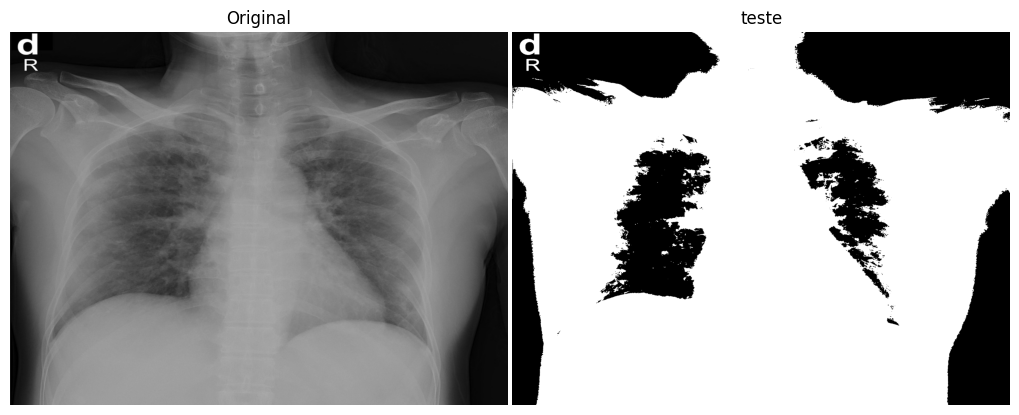

In [45]:
compare(imagem_covid[5], binary_covid[5], 'teste')

In [46]:
print(imagem_covid[5].shape)
print(binary_covid[5].shape)

(1500, 2000, 3)
(1500, 2000)


In [47]:
type(imagem_covid[5])

numpy.ndarray

In [48]:
binary_normal =[]

for i in range(len(gray_normal)):
    binary = (gray_normal[i] > threshold_otsu(gray_normal[i])).astype(int)
    if binary is not None:
        binary_normal.append(binary)

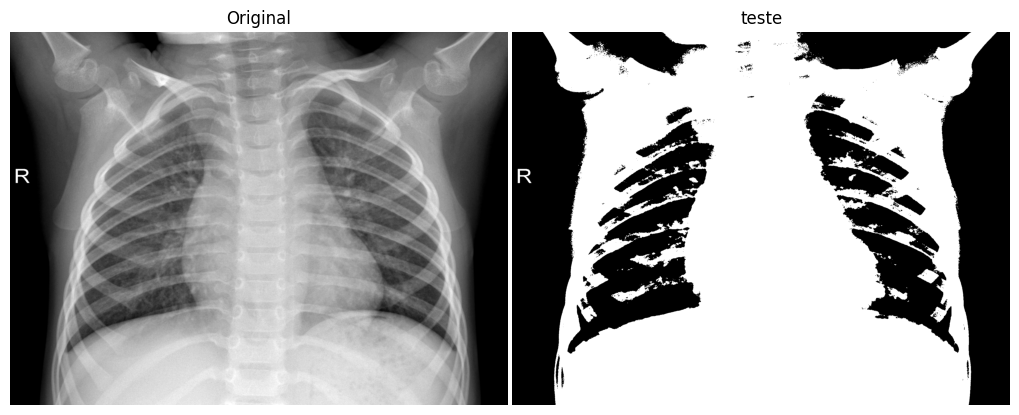

In [49]:
compare(imagem_normal[5], binary_normal[5], 'teste')

In [50]:
print(imagem_normal[5].shape)
print(binary_normal[5].shape) #os shapes permanecem iguais aos valores colocados no step de importação da base

(1500, 2000)
(1500, 2000)


In [51]:
type(binary_normal[5])

numpy.ndarray

In [52]:
binary_normal[60]

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
binary_covid[0].dtype

### Criação de Dataframes

In [53]:
import pandas as pd

In [55]:
gray_covid = [img.astype(np.float16) for img in gray_covid] #transformando para float16 pois tive problemas de memória usando na forma tradicional

In [56]:
df_covid = pd.DataFrame({'images':gray_covid})  #criação de dataframe das imagens acinzentadas de covid

In [57]:
df_covid.head()

,images
0,"[[0.714, 0.6626, 0.596, 0.5566, 0.549, 0.5566,..."
1,"[[0.11926, 0.1252, 0.1213, 0.1252, 0.1292, 0.1..."
2,"[[0.05884, 0.0549, 0.0549, 0.0549, 0.0549, 0.0..."
3,"[[0.1726, 0.1098, 0.011765, 0.00392, 0.00392, ..."
4,"[[0.639, 0.639, 0.643, 0.643, 0.643, 0.647, 0...."


In [58]:
df_covid['classification'] = 'covid' #criando uma coluna que demonstra que todos os itens desse dataframe possuem classsificação de covid

In [59]:
df_covid.head()

,images,classification
0,"[[0.714, 0.6626, 0.596, 0.5566, 0.549, 0.5566,...",covid
1,"[[0.11926, 0.1252, 0.1213, 0.1252, 0.1292, 0.1...",covid
2,"[[0.05884, 0.0549, 0.0549, 0.0549, 0.0549, 0.0...",covid
3,"[[0.1726, 0.1098, 0.011765, 0.00392, 0.00392, ...",covid
4,"[[0.639, 0.639, 0.643, 0.643, 0.643, 0.647, 0....",covid


In [60]:
df_covid.shape

(69, 2)

In [61]:
gray_normal = [img.astype(np.float16) for img in gray_normal]

In [62]:
df_normal = pd.DataFrame({'images':gray_normal}) #criação de dataframe das imagens acinzentadas de normal

In [63]:
df_normal['classification'] = 'normal'

In [64]:
df_normal.head()

,images,classification
0,"[[0.0, 20.0, 22.0, 20.0, 20.0, 22.0, 22.0, 22....",normal
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",normal
2,"[[0.0, 99.0, 102.0, 101.0, 100.0, 99.0, 99.0, ...",normal
3,"[[27.0, 27.0, 28.0, 30.0, 30.0, 28.0, 30.0, 33...",normal
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",normal


In [65]:
df_normal.shape

(79, 2)

In [66]:
df = pd.concat([df_covid, df_normal], axis=0, ignore_index=True) #junção dos dataframes covid e normal e resetando o index

In [67]:
df.shape

(148, 2)

In [68]:
df.head()

,images,classification
0,"[[0.714, 0.6626, 0.596, 0.5566, 0.549, 0.5566,...",covid
1,"[[0.11926, 0.1252, 0.1213, 0.1252, 0.1292, 0.1...",covid
2,"[[0.05884, 0.0549, 0.0549, 0.0549, 0.0549, 0.0...",covid
3,"[[0.1726, 0.1098, 0.011765, 0.00392, 0.00392, ...",covid
4,"[[0.639, 0.639, 0.643, 0.643, 0.643, 0.647, 0....",covid


In [70]:
df['images'] = df['images'].apply(lambda x: x / np.max(x)) #normalização das imagens para consumir menos memória

In [71]:
#from skimage.feature import hog

In [72]:
#hog_features = hog(gray_covid[0], 
#                    orientations=9, 
#                    pixels_per_cell=(8, 8), 
#                    cells_per_block=(2, 2),)

### Treinamento de modelo

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [74]:
batch_size = 100
flattened_images = []
for start in range(0, len(df), batch_size):
    end = start + batch_size
    batch = df['images'].iloc[start:end].apply(lambda x: x.flatten())
    flattened_images.extend(batch) #tentei achatar as numpies mas houve problema de memória
                                   #por isso separei em batches e criei uma lista onde os valores achatados serão adicionados na lista

In [75]:
df['images_flattened'] = flattened_images #adicionando as imagens achatadas como uma coluna do dataframe

In [76]:
#df['label'] = le.fit_transform(df['classification'])

In [77]:
le = LabelEncoder()
df['label'] = (df['classification']).map({'covid':1, 'normal':0}) #encoding das labels para funcionamento do modelo

In [78]:
df.head() #verificação da imagem do dataframe

,images,classification,images_flattened,label
0,"[[0.714, 0.6626, 0.596, 0.5566, 0.549, 0.5566,...",covid,"[0.714, 0.6626, 0.596, 0.5566, 0.549, 0.5566, ...",1
1,"[[0.11926, 0.1252, 0.1213, 0.1252, 0.1292, 0.1...",covid,"[0.11926, 0.1252, 0.1213, 0.1252, 0.1292, 0.12...",1
2,"[[0.05884, 0.0549, 0.0549, 0.0549, 0.0549, 0.0...",covid,"[0.05884, 0.0549, 0.0549, 0.0549, 0.0549, 0.05...",1
3,"[[0.1726, 0.1098, 0.011765, 0.00392, 0.00392, ...",covid,"[0.1726, 0.1098, 0.011765, 0.00392, 0.00392, 0...",1
4,"[[0.639, 0.639, 0.643, 0.643, 0.643, 0.647, 0....",covid,"[0.639, 0.639, 0.643, 0.643, 0.643, 0.647, 0.6...",1


In [79]:
X = np.stack(df['images_flattened'].values) #adiciona uma dimensão na array. Foi a solução encontrada, pois o modelo não estava funcionando antes disso
y = df['label'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #separação em treino e teste

In [81]:
print(X.shape)
print(X_train.shape) #verificação se os tamanhos foram separados adequadamente

(148, 3000000)
(118, 3000000)


In [82]:
#X = X.apply(pd.to_numeric, errors='coerce')

In [83]:
#X = df.loc[:, df.columns != 'classification' ]  # Entrada
#y = df['classification']    # Saída

In [84]:
tuned_parameters = [{'n_estimators': [50,100,150], #criação de parâmetros para serem testados no modelo
                     'max_features': [2,4,5,6,7,8],
                     'max_samples': [0.5],
                     'min_samples_split':[2,3,4,5],
                      'max_depth': [3,4]}]
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'f1': 'f1' #scores que gostaria que aparecessem
}

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, verbose=0 ,random_state=200),
                     tuned_parameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=200),
             param_grid=[{'max_depth': [3, 4],
                          'max_features': [2, 4, 5, 6, 7, 8],
                          'max_samples': [0.5],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [50, 100, 150]}])

In [104]:
print("Best parameters:", clf.best_params_) #melhores parâmetros do modelo

Best parameters: {'max_depth': 3, 'max_features': 2, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred = clf.predict(X_test) #previsão da base de teste
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       covid       0.93      0.93      0.93        14
      normal       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [90]:
iguais_e_1 = []
iguais_e_0 = []
diferentes = []
for i in range(len(y_pred)):
    igualdade = y_pred[i] == y_test[i]
    if igualdade and y_pred[i] == 1:
        iguais_e_1.append(i)
    elif igualdade and y_pred[i] == 0:
        iguais_e_0.append(i)
    else:
        diferentes.append(i) #criei listas para verificar os valores esperados e saber preencher o gráfico com os labels corretos

In [91]:
print(len(iguais_e_1))
print(len(iguais_e_0))
print(len(diferentes))

15
13
2


In [92]:
diferentes

[9, 23]

In [105]:
print(y_pred[23])
print(y_test[23])

1
0


Acurácia:  0.9333333333333333
Kappa:  0.8660714285714286
F1:  0.9333333333333333


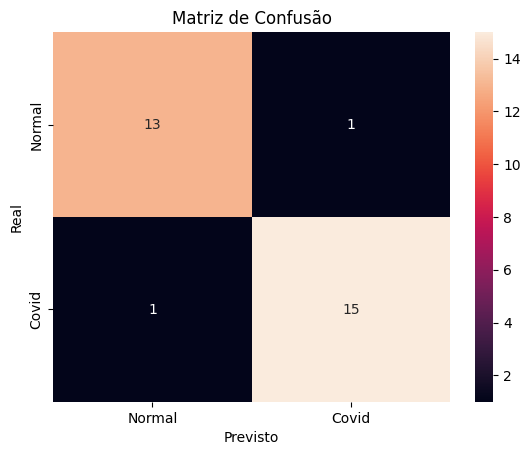

In [94]:
def evaluate(y_test, y_pred): #função para gerar imagem e indicadores das previsões e realidade

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.ylabel('Real')
  plt.xlabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Normal', 'Covid'])
  ax.yaxis.set_ticklabels(['Normal', 'Covid'])
  plt.show()

evaluate(y_test, y_pred)